In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns
from modules.stats import *
from modules.PCA import *
from modules.LDA import *
from modules.read_data import *
from modules.LR import *
from modules.ROC import *
from modules.LR import *
from modules.KNN import *
from modules.DTW import *
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense

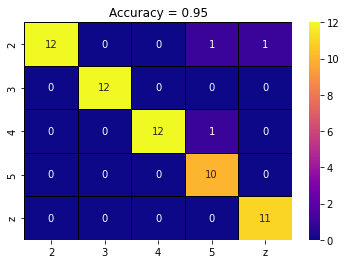

In [2]:
##KNN
path = 'Assets/Isolated Digits'
data_class = ['2', '3', '4', '5', 'z']

C = []; D = []
for i in data_class:
	C.append(read_digit(path, i, 'train')[0])
	D.append(read_digit(path, i, 'dev')[0])
C_y = []
D_y = []

for i in range(5):
	C_y.append(i * np.ones(len(C[i])))
	D_y.append(i * np.ones(len(D[i])))
Cn = []
Dn = []
for c in range(5):
	C_new = np.array(C[c][0])
	D_new = np.array(D[c][0])
	for i in range(1,len(C[c])):
		C_new = np.vstack((C_new, np.array(C[c][i])))
	for i in range(1,len(D[c])):
		D_new = np.vstack((D_new, np.array(D[c][i])))
	Cn.append(C_new)
	Dn.append(D_new)
Yn = []
Yn_d = []

for i in range(5):
	Yn.append(i * np.ones(len(Cn[i])))
	Yn_d.append(i * np.ones(len(Dn[i])))

Yn = np.concatenate(Yn, axis=0)
Yn_d = np.concatenate(Yn_d, axis=0)
X = np.concatenate(Cn, axis=0)
X_d = np.concatenate(Dn, axis=0)
Y = np.concatenate(C_y, axis=0)
Y_d = np.concatenate(D_y, axis=0)
pca = False
lda = False
lda = ~pca & lda #if pca is true then lda is false
if pca:
	pc = 15
	μ, Σ = stats(X)
	eigval, Q = PCA(Σ, pc)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 15
	μ, Σ = stats(X)
	μk = []
	for c in range(5):
		μk.append(stats(X[Yn == c])[0])
	μk = np.array(μk)
	v = LDA(X,Yn,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
if pca or lda:
	cn = 0
	dn = 0
	C_new = []
	D_new = []
	for c in range(5):
		t = []
		d = []
		for i in range(len(C[c])):
			t.append(X[cn:cn+len(C[c][i])])
			cn += len(C[c][i])
		for i in range(len(D[c])):
			d.append(X_d[dn:dn+len(D[c][i])])
			dn += len(D[c][i])
		D_new.append(d)
		C_new.append(t)
	D = D_new
	C = C_new
P = []
for cl in range(5):
	p = []
	for dev in D[cl]:
		cost = []
		for c in range(5):
			for train in C[c]:
				cost.append([DTW(dev, train)[-1,-1], c])
		cost = np.array(cost)
		idx = cost[:,0].argsort()
		cost = cost[idx]
		p.append(cost[:, 1])
	P.append(p)
k = 10
Q = []
score = []
for c in range(5):
	q = []
	s = []
	for j in range(len(D[c])):
		data = P[c][j][:k]
		q.append(statistics.mode(data))
		s.append(np.array([(data==0).sum()/k, (data==1).sum()/k, (data==2).sum()/k, (data==3).sum()/k, (data==4).sum()/k]))
	Q.append(q)
	score.append(s)
y_pred = np.concatenate(Q)
score = np.concatenate(score)

cm = confusion_matrix(y_pred,Y_d)
accuracy = accuracy_score(Y_d,y_pred)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = data_class, yticklabels = data_class)
ax.set_title(f'Accuracy = {accuracy}')
TPR_d1 = 0; FPR_d1 = 0
for c in range(5):
	tpr, fpr = ROC(label_binarize(Y_d, classes=[0,1,2,3,4])[:,c], score[:,c])
	TPR_d1 += tpr/5
	FPR_d1 += fpr/5

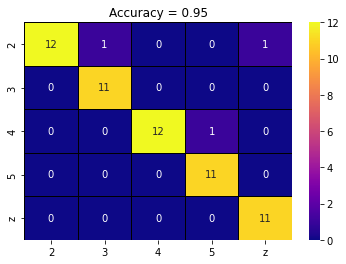

In [3]:
##KNN
path = 'Assets/Isolated Digits'
data_class = ['2', '3', '4', '5', 'z']

C = []; D = []
for i in data_class:
	C.append(read_digit(path, i, 'train')[0])
	D.append(read_digit(path, i, 'dev')[0])
C_y = []
D_y = []

for i in range(5):
	C_y.append(i * np.ones(len(C[i])))
	D_y.append(i * np.ones(len(D[i])))
Cn = []
Dn = []
for c in range(5):
	C_new = np.array(C[c][0])
	D_new = np.array(D[c][0])
	for i in range(1,len(C[c])):
		C_new = np.vstack((C_new, np.array(C[c][i])))
	for i in range(1,len(D[c])):
		D_new = np.vstack((D_new, np.array(D[c][i])))
	Cn.append(C_new)
	Dn.append(D_new)
Yn = []
Yn_d = []

for i in range(5):
	Yn.append(i * np.ones(len(Cn[i])))
	Yn_d.append(i * np.ones(len(Dn[i])))

Yn = np.concatenate(Yn, axis=0)
Yn_d = np.concatenate(Yn_d, axis=0)
X = np.concatenate(Cn, axis=0)
X_d = np.concatenate(Dn, axis=0)
Y = np.concatenate(C_y, axis=0)
Y_d = np.concatenate(D_y, axis=0)
pca = False
lda = True
lda = ~pca & lda #if pca is true then lda is false
if pca:
	pc = 15
	μ, Σ = stats(X)
	eigval, Q = PCA(Σ, pc)
	X = X @ Q
	X_d = X_d @ Q
if lda:
	pc = 15
	μ, Σ = stats(X)
	μk = []
	for c in range(5):
		μk.append(stats(X[Yn == c])[0])
	μk = np.array(μk)
	v = LDA(X,Yn,μ,μk,pc)
	X = np.abs(X @ v)
	X_d = np.abs(X_d @ v)
if pca or lda:
	cn = 0
	dn = 0
	C_new = []
	D_new = []
	for c in range(5):
		t = []
		d = []
		for i in range(len(C[c])):
			t.append(X[cn:cn+len(C[c][i])])
			cn += len(C[c][i])
		for i in range(len(D[c])):
			d.append(X_d[dn:dn+len(D[c][i])])
			dn += len(D[c][i])
		D_new.append(d)
		C_new.append(t)
	D = D_new
	C = C_new
P = []
for cl in range(5):
	p = []
	for dev in D[cl]:
		cost = []
		for c in range(5):
			for train in C[c]:
				cost.append([DTW(dev, train)[-1,-1], c])
		cost = np.array(cost)
		idx = cost[:,0].argsort()
		cost = cost[idx]
		p.append(cost[:, 1])
	P.append(p)
k = 10
Q = []
score = []
for c in range(5):
	q = []
	s = []
	for j in range(len(D[c])):
		data = P[c][j][:k]
		q.append(statistics.mode(data))
		s.append(np.array([(data==0).sum()/k, (data==1).sum()/k, (data==2).sum()/k, (data==3).sum()/k, (data==4).sum()/k]))
	Q.append(q)
	score.append(s)
y_pred = np.concatenate(Q)
score = np.concatenate(score)

cm = confusion_matrix(y_pred,Y_d)
accuracy = accuracy_score(Y_d,y_pred)
ax = sns.heatmap(cm, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = data_class, yticklabels = data_class)
ax.set_title(f'Accuracy = {accuracy}')
TPR_d3 = 0; FPR_d3 = 0
for c in range(5):
	tpr, fpr = ROC(label_binarize(Y_d, classes=[0,1,2,3,4])[:,c], score[:,c])
	TPR_d3 += tpr/5
	FPR_d3 += fpr/5

In [4]:
%store -r TPR_d2
%store -r FPR_d2

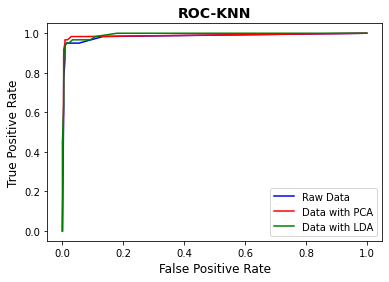

In [5]:
plt.plot(FPR_d1, TPR_d1, 'b')
plt.plot(FPR_d2, TPR_d2, 'r')
plt.plot(FPR_d3, TPR_d3, 'g')
# plt.plot(FPR4, TPR4)
plt.xlabel('False Positive Rate',fontsize=12); plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC-KNN',fontweight="bold", fontsize=14)
plt.legend(['Raw Data', 'Data with PCA', 'Data with LDA'])